In [1]:
# configure logging
from logging import Formatter
from logging import getLogger
from logging import INFO
from logging import StreamHandler

logger = getLogger(__name__)
logger.handlers.clear()
handler = StreamHandler()
handler.setLevel(INFO)
handler.setFormatter(Formatter('%(name)s - %(asctime)s - %(levelname)s - %(message)s'))
logger.addHandler(handler)

In [2]:
# we want the 2015 data
from os import walk
from os.path import join
top = '../input/' #'/kaggle/input'
for dirname, _, filenames in walk(top=top,):
    for filename in sorted(filenames):
        if '2015' in filename:
            logger.info(join(dirname, filename))

__main__ - 2023-06-13 18:34:37,954 - INFO - ../input/mortality/2015_codes.json
__main__ - 2023-06-13 18:34:37,956 - INFO - ../input/mortality/2015_data.csv


In [3]:
# load the data and report the shape and columns
from pandas import read_csv
from pandas import DataFrame

filename = '../input/mortality/2015_data.csv'
logger.info(msg='reading {}'.format(filename))
df = read_csv(filepath_or_buffer=filename, low_memory=False, )
logger.info(msg=df.shape)
logger.info(msg=df.columns.tolist())

__main__ - 2023-06-13 18:34:37,971 - INFO - reading ../input/mortality/2015_data.csv
__main__ - 2023-06-13 18:35:08,510 - INFO - (2718198, 77)
__main__ - 2023-06-13 18:35:08,511 - INFO - ['resident_status', 'education_1989_revision', 'education_2003_revision', 'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type', 'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27', 'age_recode_12', 'infant_age_recode_22', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'current_data_year', 'injury_at_work', 'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code', 'place_of_injury_for_causes_w00_y34_except_y06_and_y07_', 'icd_code_10th_revision', '358_cause_recode', '113_cause_recode', '130_infant_cause_recode', '39_cause_recode', 'number_of_entity_axis_conditions', 'entity_condition_1', 'entity_condition_2', 'entity_condition_3', 'entity_condition_4', 'entity_condition_5', 'entity_condition_6', 'entity_condition_7', '

In [4]:
# report the types
logger.info(msg=df.dtypes)
logger.info(msg=type(df.dtypes))

__main__ - 2023-06-13 18:35:08,529 - INFO - resident_status                 int64
education_1989_revision       float64
education_2003_revision       float64
education_reporting_flag        int64
month_of_death                  int64
                               ...   
race_imputation_flag          float64
race_recode_3                   int64
race_recode_5                   int64
hispanic_origin                 int64
hispanic_originrace_recode      int64
Length: 77, dtype: object
__main__ - 2023-06-13 18:35:08,532 - INFO - <class 'pandas.core.series.Series'>


In [5]:
# get ready to plot
%matplotlib inline
from matplotlib.pyplot import style
from matplotlib.pyplot import plot

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plot_style = 'seaborn-v0_8-white'
style.use(plot_style)

<Axes: xlabel='month of death'>

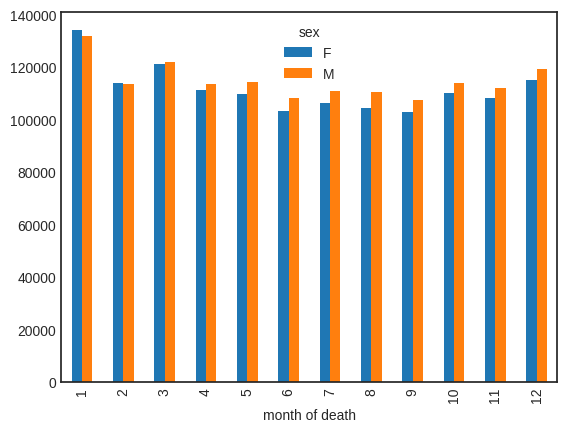

In [6]:
# make a simple plot
columns = ['month of death', 'sex']
renamer = {'month_of_death': 'month of death'}
df.rename(columns=renamer).groupby(by=columns).size().unstack().plot(kind='bar')

In [7]:
# we are done
logger.info(msg='done')

__main__ - 2023-06-13 18:35:11,426 - INFO - done
